<a href="https://colab.research.google.com/github/TranPhamTrungHy/AI-ST7-1234/blob/main/AI_ST7_BANKNOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/AI/Banknotes_train/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k '):
    output = 1
  if file.startswith('10k '):
    output = 2
  if file.startswith('20k '):
    output = 3
  if file.startswith('50k '):
    output = 4
  if file.startswith('100k '):
    output = 5
  if file.startswith('500k '):
    output = 6
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('Banknote_photos_train.npy',photos)
save('Banknote_labels_train.npy',labels)

(360, 30, 40, 3) (360,)


In [184]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/AI/Banknotes_test/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k '):
    output = 1
  if file.startswith('10k '):
    output = 2
  if file.startswith('20k '):
    output = 3
  if file.startswith('50k '):
    output = 4
  if file.startswith('100k '):
    output = 5
  if file.startswith('500k '):
    output = 6
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('Banknote_photos_test.npy',photos)
save('Banknote_labels_test.npy',labels)

(60, 30, 40, 3) (60,)


In [185]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/AI/Banknote_photos_train.npy')
y_train = np.load('/content/drive/MyDrive/AI/Banknote_labels_train.npy')
x_test = np.load('/content/drive/MyDrive/AI/Banknote_photos_test.npy')
y_test = np.load('/content/drive/MyDrive/AI/Banknote_labels_test.npy')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(360, 30, 40, 3)
(360,)
(60, 30, 40, 3)
(60,)


In [186]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [207]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#256 lan tich chap
model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=9,epochs = 50,verbose = 1)

test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',round(test_loss,3))
print('Độ chính xác:',round(test_acc*100,3),'%')

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_149 (Conv2D)         (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 15, 20, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_202 (Dropout)       (None, 15, 20, 32)        0         
                                                                 
 conv2d_150 (Conv2D)         (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 8, 10, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_203 (Dropout)       (None, 8, 10, 64)       

In [196]:
model.save('banknote.h5')

1/1 [==============================] - 0s 79ms/step


'50k'

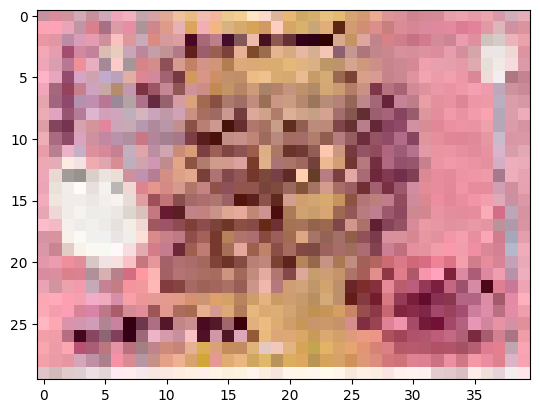

In [210]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: '5k',2:'10k', 3:'20k', 4:'50k', 5:'100k', 6:'500k' }
img = load_img("/content/drive/MyDrive/AI/4_(1)5.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]